In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
#url = 'https://github.com/jmbruner37/fitness_tracking/blob/master/ac_activities_garmin.csv'

activities_csv = pd.read_csv('ac_activities_torben_clean_v2.csv')
activities_csv = activities_csv[activities_csv['type'] == 'Run'] 
activities_csv.head()

,id,type,start_date_local,x_start_h,name,name_short,x_min,x_mi,x_min/mi,x_mph,...,athlete_count,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url
0,868156484,Run,15.01.2017 06:17:41,6.3,Morning Run,Morning,248.2,26.510,9.36,6.41,...,29,NaN,42663.3,14892,33.176906,-117.335854,(GMT-08:00) America/Los_Angeles,2017-01-15,0.51,https://www.strava.com/activities/868156484
1,868156415,Run,17.01.2017 18:50:18,18.8,Evening Run,Evening,16.1,2.023,7.95,7.55,...,30,NaN,3256.2,1300,32.720301,-117.150205,(GMT-08:00) America/Los_Angeles,2017-01-17,NaN,https://www.strava.com/activities/868156415
2,868156459,Run,19.01.2017 06:35:12,6.6,Morning Run,Morning,87.0,10.091,8.62,6.96,...,1,NaN,16240.6,5271,32.853794,-116.960111,(GMT-08:00) America/Los_Angeles,2017-01-19,0.85,https://www.strava.com/activities/868156459
3,868156435,Run,21.01.2017 07:17:12,7.3,Morning Run,Morning,88.8,11.518,7.71,7.78,...,2,NaN,18535.6,5804,32.758368,-117.242017,(GMT-08:00) America/Los_Angeles,2017-01-21,0.16,https://www.strava.com/activities/868156435
4,868156458,Run,22.01.2017 16:50:51,16.8,Afternoon Run,Afternoon,89.6,10.066,8.90,6.74,...,1,NaN,16199.8,5658,32.853570,-116.960471,(GMT-08:00) America/Los_Angeles,2017-01-22,0.48,https://www.strava.com/activities/868156458


In [3]:
activities_csv.dtypes

id                        int64
type                     object
start_date_local         object
x_start_h               float64
name                     object
name_short               object
x_min                   float64
x_mi                    float64
x_min/mi                float64
x_mph                   float64
x_max_mph               float64
total_elevation_gain    float64
average_heartrate       float64
max_heartrate           float64
average_cadence         float64
x_nearest_city_start     object
x_dist_start_end_km     float64
start_latlng             object
end_latlng               object
elev_low                float64
elev_high               float64
athlete_count             int64
average_temp            float64
distance                float64
elapsed_time              int64
start_latitude          float64
start_longitude         float64
timezone                 object
x_date                   object
x_elev_%                float64
x_url                    object
dtype: o

In [4]:
#activities = activities_csv[["id", "type", "start_date_local", "x_start_h", "name_short", "x_min", "x_mi", "x_min/mi", "x_mph", "x_max_mph", "start_latlng", "end_latlng", "athlete_count", "distance", "elapsed_time", "start_latitude", "start_longitude", "timezone", "x_date", "x_url"]].copy()
activities = activities_csv[["x_start_h", "name_short", "x_min", "x_mi", "x_min/mi", "x_mph", "x_max_mph", "total_elevation_gain", "average_heartrate", "max_heartrate", "average_cadence", "elev_low", "elev_high", "athlete_count", "average_temp", "distance", "elapsed_time"]].copy()
activities.head()

,x_start_h,name_short,x_min,x_mi,x_min/mi,x_mph,x_max_mph,total_elevation_gain,average_heartrate,max_heartrate,average_cadence,elev_low,elev_high,athlete_count,average_temp,distance,elapsed_time
0,6.3,Morning,248.2,26.510,9.36,6.41,9.17,217.6,NaN,NaN,80.8,-7.1,97.1,29,NaN,42663.3,14892
1,18.8,Evening,16.1,2.023,7.95,7.55,11.41,0.0,NaN,NaN,84.5,40.7,44.6,30,NaN,3256.2,1300
2,6.6,Morning,87.0,10.091,8.62,6.96,9.62,137.6,NaN,NaN,84.0,106.0,201.5,1,NaN,16240.6,5271
3,7.3,Morning,88.8,11.518,7.71,7.78,9.17,29.5,NaN,NaN,84.9,1.3,20.1,2,NaN,18535.6,5804
4,16.8,Afternoon,89.6,10.066,8.90,6.74,8.50,77.0,NaN,NaN,83.0,96.0,137.9,1,NaN,16199.8,5658


In [5]:
activities.dtypes

x_start_h               float64
name_short               object
x_min                   float64
x_mi                    float64
x_min/mi                float64
x_mph                   float64
x_max_mph               float64
total_elevation_gain    float64
average_heartrate       float64
max_heartrate           float64
average_cadence         float64
elev_low                float64
elev_high               float64
athlete_count             int64
average_temp            float64
distance                float64
elapsed_time              int64
dtype: object

In [6]:
#activities["x_min"] = activities["x_min"].apply(pd.to_numeric,errors="coerce")
#activities["start_date_local"] = activities["start_date_local"].apply(pd.to_datetime,errors="coerce")

In [7]:
activities = activities.dropna()
activities["pace"] = activities["x_min/mi"]

In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

#X = activities[["x_min", "x_mph"]]
#y = activities["x_mi"].values.reshape(-1, 1)

X = activities[["x_start_h", "x_mi", "x_max_mph", "total_elevation_gain", "average_heartrate", "max_heartrate", "average_cadence", "elev_low", "elev_high", "athlete_count", "average_temp"]]
y = activities["pace"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (49, 11) (49, 1)


In [9]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [10]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [11]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9804983057972124
Testing Score: 0.7967471989354613


In [12]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 8.24187967547557
R-squared (R2 ): 0.7967471989354613


In [13]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.7967471989354613

Text(0.5, 1.0, 'Residual Plot')

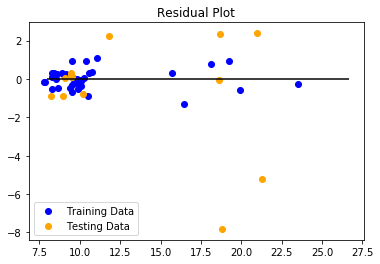

In [14]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION